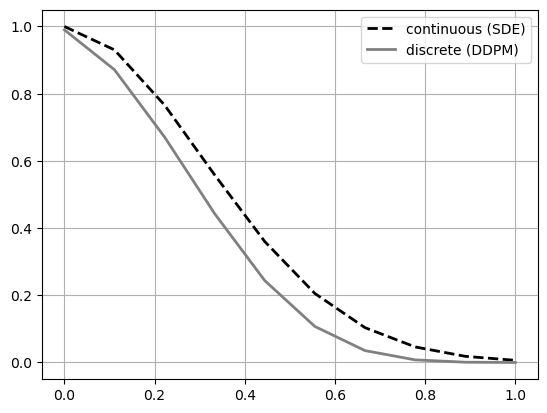

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class NoiseSchedule:
    def __init__(self, beta_min=0.1, beta_max=20):
        self.beta_min = beta_min
        self.beta_max = beta_max

    def beta(self, t):
        return self.beta_min + (self.beta_max - self.beta_min) * t
        
    def alpha(self, t):
        return np.exp(-(self.beta_min * t + (self.beta_max-self.beta_min) * t**2 / 2))


scheduler = NoiseSchedule(beta_min=0.1, beta_max=10)

n_steps = 10
t_steps = np.linspace(0, 1, n_steps)

betas = scheduler.beta(t_steps)

betas_discrete = betas / n_steps

alphas_cts = scheduler.alpha(t_steps)  

alphas_discrete = np.zeros_like(alphas_cts)

alphas_discrete[0] = 1-betas_discrete[0]

for i in range(1, n_steps):
    alphas_discrete[i] = alphas_discrete[i-1] * (1-betas_discrete[i])

plt.plot(t_steps, alphas_cts, label='continuous (SDE)', color='k', ls='--', lw=2)
plt.plot(t_steps, alphas_discrete, label='discrete (DDPM)', color='grey', lw=2)
plt.legend()
plt.grid()
plt.show()





